# Alucar - Analisando assinantes da newsletter

# 0. Configurações

In [1]:
# bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# função do gráfico de comparação

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize = (16, 12))

    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize = 18, loc = 'left')
    sns.lineplot(x = x, y = y1, data = dataset)

    plt.subplot(3,1,2)
    sns.lineplot(x = x, y = y2, data = dataset)

    plt.subplot(3,1,3)
    sns.lineplot(x = x, y = y3, data = dataset)

In [3]:
# base de dados

assinantes = pd.read_csv('dados/newsletter_alucar.csv')

# 1. Visão geral da base

In [4]:
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [5]:
assinantes.shape

(24, 2)

In [6]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [7]:
assinantes.isna().sum().sum()

0

In [8]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [9]:
# criar colunas de aumento e aceleração

assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()

In [10]:
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


# 2. Gráfico

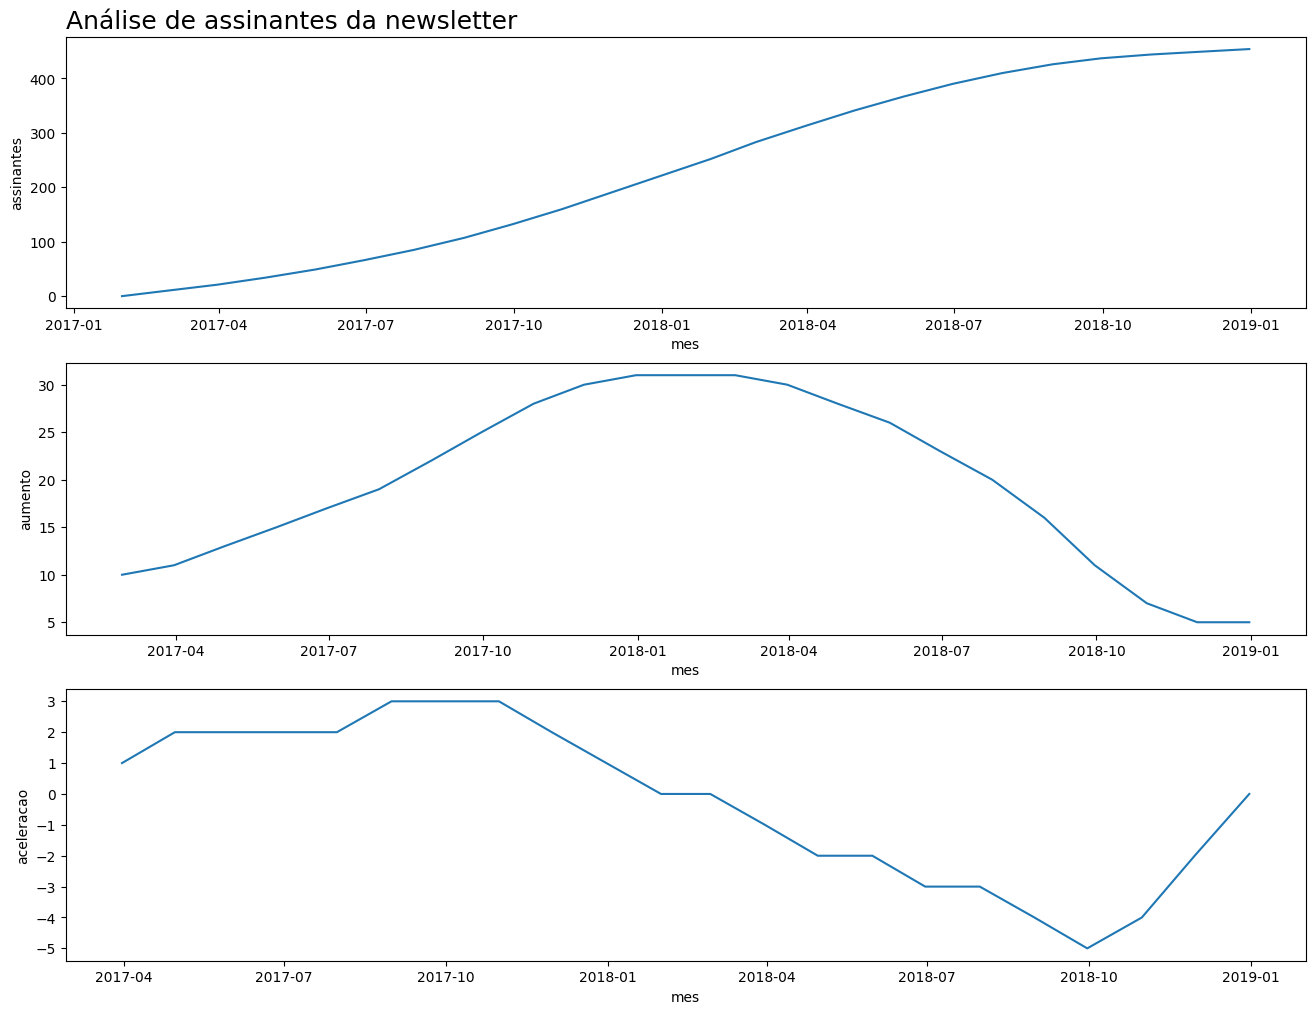

In [11]:
plot_comparacao(x = 'mes', y1 = 'assinantes', y2 = 'aumento', y3 = 'aceleracao', dataset = assinantes, titulo = 'Análise de assinantes da newsletter')

# 3. Análise Chocolura

In [12]:
chocolura = pd.read_csv('dados/chocolura.csv')

In [13]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [14]:
chocolura.shape

(24, 2)

In [15]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])

In [16]:
chocolura.isna().sum().sum()

0

In [17]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()

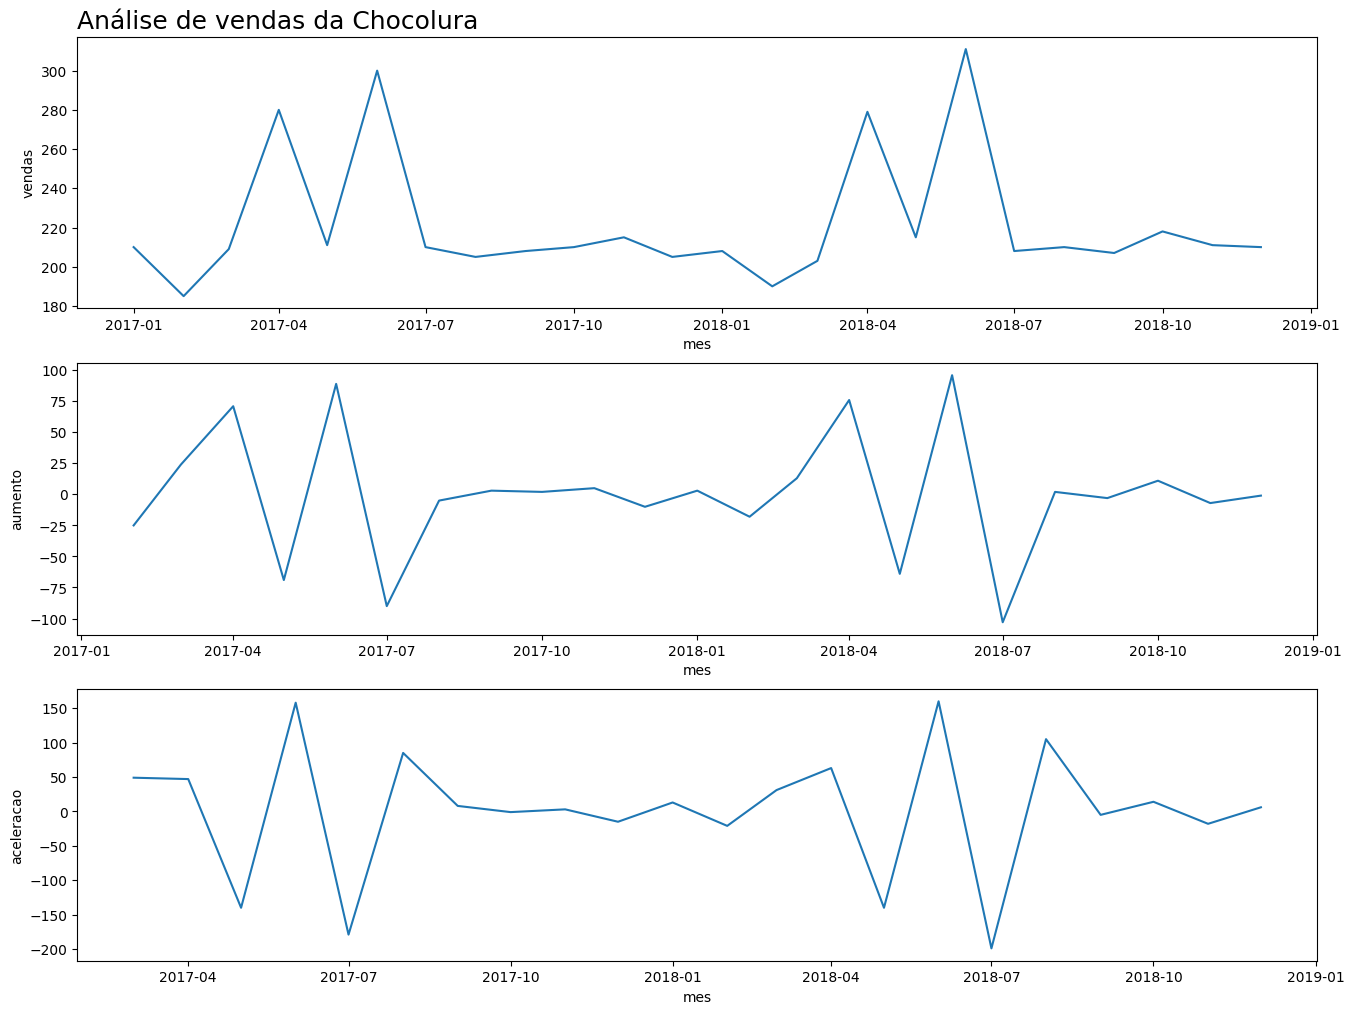

In [18]:
plot_comparacao(x = 'mes', y1 = 'vendas', y2 = 'aumento', y3 = 'aceleracao', dataset = chocolura, titulo = 'Análise de vendas da Chocolura')

# 4. Chocolura - vendas diárias (outubro e novembro)

In [19]:
vendas_por_dia = pd.read_csv('dados/vendas_por_dia.csv')

In [20]:
vendas_por_dia.shape

(61, 2)

In [21]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [22]:
vendas_por_dia.isna().sum().sum()

0

In [23]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()

In [24]:
vendas_por_dia.dtypes

dia           datetime64[ns]
vendas                 int64
aumento              float64
aceleracao           float64
dtype: object

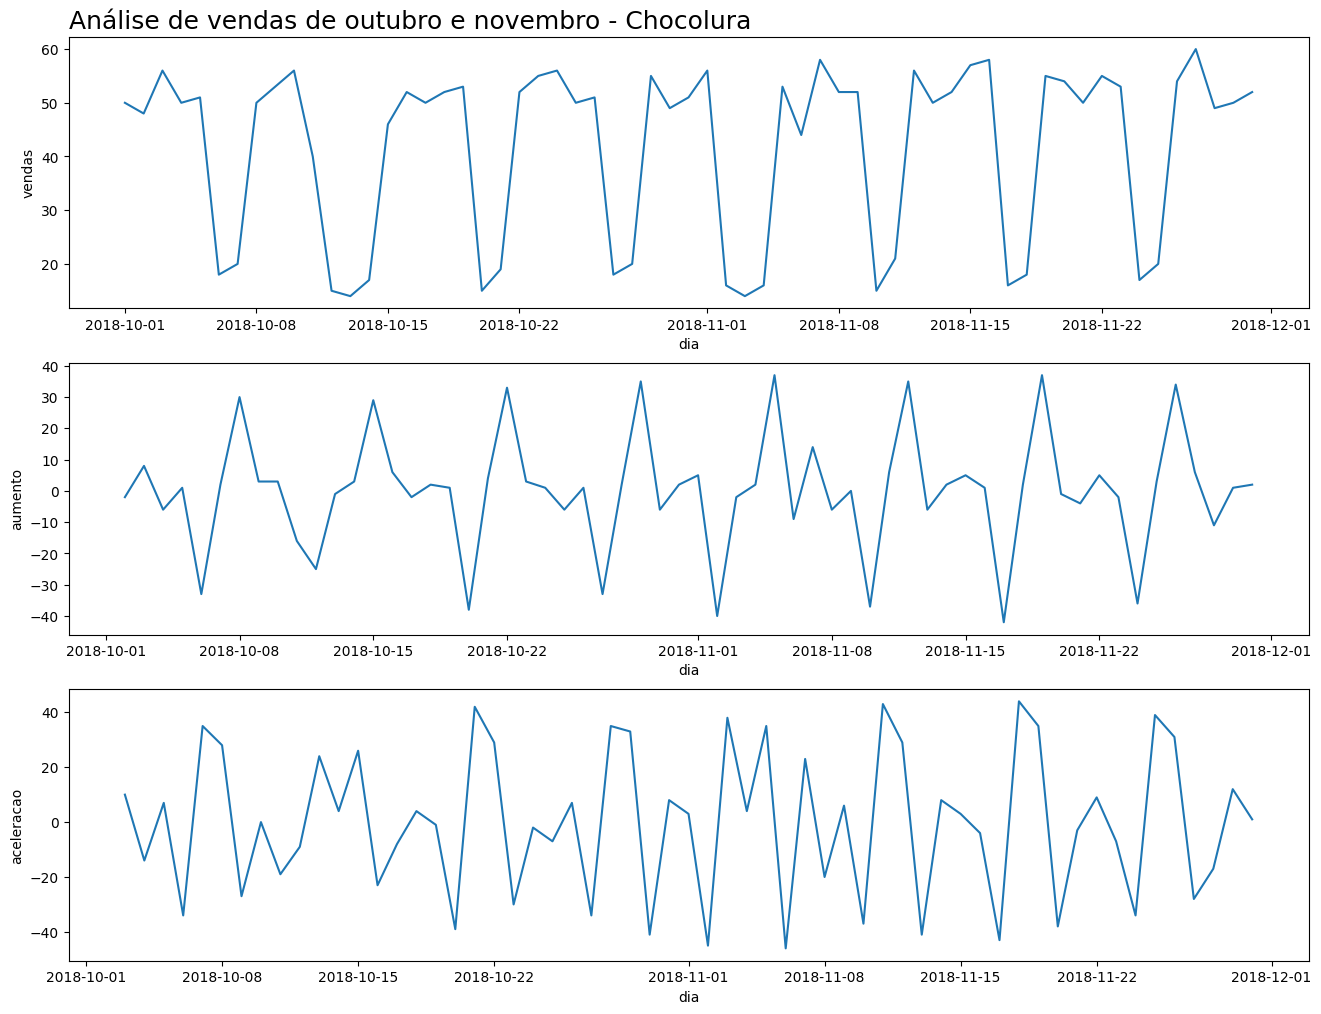

In [25]:
plot_comparacao(x = 'dia', y1 = 'vendas', y2 = 'aumento', y3 = 'aceleracao', dataset = vendas_por_dia, 
                titulo = 'Análise de vendas de outubro e novembro - Chocolura')

## 4.1. Analisando a sazonalidade

In [27]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.strftime("%A")
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [29]:
dias_traduzidos = {
    'Monday':"Segunda-feira",
    'Tuesday':"Terça-feira",
    'Wednesday':"Quarta-feira",
    'Thursday':"Quinta-feira",
    'Friday':"Sexta-feira",
    'Saturday':"Sábado",
    'Sunday':"Domingo"
}

vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)

vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-feira
1,2018-10-02,48,-2.0,NaN,Terça-feira
2,2018-10-03,56,8.0,10.0,Quarta-feira
3,2018-10-04,50,-6.0,-14.0,Quinta-feira
4,2018-10-05,51,1.0,7.0,Sexta-feira


In [30]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda-feira
1,2018-10-02,48,-2.0,NaN,Terça-feira
2,2018-10-03,56,8.0,10.0,Quarta-feira
3,2018-10-04,50,-6.0,-14.0,Quinta-feira
4,2018-10-05,51,1.0,7.0,Sexta-feira
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda-feira
8,2018-10-09,53,3.0,-27.0,Terça-feira
9,2018-10-10,56,3.0,0.0,Quarta-feira


In [32]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[['vendas', 'aumento', 'aceleracao']].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta-feira,53.0,1.0,2.0
Quinta-feira,51.0,-2.0,-3.0
Segunda-feira,52.0,34.0,31.0
Sexta-feira,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça-feira,52.0,-1.0,-34.0
